# R Exam

Gross domestic product (GDP) is a monetary measure of the market value of all the final goods and services produced in a specific time period. In spanish is called the PIB (Producto Interno Bruto).
The Human Development Index (HDI) is a statistic composite index of life expectancy, education (Literacy Rate, Gross Enrollment Ratio at different levels and Net Attendance Ratio), and per capita income indicators, which are used to rank countries into four tiers of human development.

Several online websites (among which the spanish wikipedia https://es.wikipedia.org/wiki/%C3%8Dndice_de_desarrollo_humano), have suggested that GDP and HDI are strongly correlated, meaning that the better the country's economy the better the human development of their citizens. Let's try to plot the data for Spain (from 2007) and analyze it.

- Load the files GDP.csv and HDI.csv using read.csv()
- Analyze the file that you have just loaded with head()  and str()
- Glue together the two data frames by columns (one next to the other) using cbind(). We want the province to match on the same rows, so you need first to sort the rows of the two data frames by Province, using order() 
- The new data frame will contain two columns names "Province". remove one of the columns
- Check that everything is fine with head() and tail(). The final data frame should have 4 columns: Province	GDP.per.capita,	CCAA and HDI. **With each province matching its CCAA**. (Fig, 1)
- Create scatterplot of text using geom_point(). Plot the GDP.per.capita (x-axis) against the HDI (y-axis). Color the points by CCAA (use color=CCAA inside the aes() function of geom_point).
- Do the same but use geom_text(). Specify as labels the names of the provinces, using aes(label=Province) inside geom_text. Color by CCAA. Also specify check_overlap=T so that the names do not overlap, if you want. (Fig, 2)
- Calculate the mean and standard deviation of GDP and HDI, by CCAA, using aggregate ().
- Create a new data frame where you put each CCAA with the corresponding mean GDP, mean HDI, stdev GDP and stdev HDI
- Madrid is a single province CCAA, so you will see that its standar deviation is NA. Replace those NAs with zeros, using is.na(). (Fig, 3)
- Plot again the original scatterplot with geom_point and color by CCAA. 
- Add over this plot another scatterplot using the new data frame (specify data=...), plotting the mean GDP against the mean HDI by CCAA that you have calculated with aggregate. These points should appear somewhere in the middle of their corresponding provinces. 
- Add also vertical and horizontal error bars to express the variablity for each CCAA (with geom_errorbar and geom_errorbarh). For geom_errorbar() you have to specify the aestetic paramters x, y, ymin and ymax. For geom_errorbarh you have to specify the aestetic paramters x, y, xmin and xmax.
- Finally, add the name of each CCAA on the plot with geom_label(). You can add the parameters  hjust=1, vjust=1 to move the labels a little bit so they don't overlap the points (Fig, 4)
- *(Optional)* It looks like that GDP is strongly correlated with HDI (the dots follow a straight line). <br> However, you should know that the formula for HDI is (roughly) LifeExpectancy + EducationIndex + GDP. <br>
Do you think there is something weird? Do you still think that concluding, by simply looking at the chart, that increasing the GDP you can increase the human development of their citizens (or viceversa)? If not, why? Should we maybe compare GDP and HDI in a different way?


**FIGURE 1**
<img src="Fig 1.png">
**FIGURE 2**
<img src="Fig 2.png">
**FIGURE 3**
<img src="Fig 3.png">
**FIGURE 4**
<img src="Fig 4.png">


## Task 1
To load the data I will use the indicated commands:

In [2]:
GDP <- read.csv("GDP.csv")
HDI <- read.csv("HDI.csv")

## Task 2

In [3]:
# head(GDP)
# str(GDP)

In [4]:
# head(HDI)
# str(HDI)

## Task 3

In [5]:
GDP_1 <- order(GDP[ ,1])
# GDP_1
gdp_org <- GDP[GDP_1,]

HDI_1 <- order(HDI[ ,1])
# HDI_1
hdi_org <- HDI[HDI_1,]

whole_table <- cbind(gdp_org, hdi_org)
# whole_table

## Task 4

In [6]:
Table <- whole_table[ ,-4]
# Table

## Task 5

In [7]:
head(Table)
tail(Table)

,Province,GDP.per.capita,CCAA,HDI
,<chr>,<dbl>,<chr>,<dbl>
48,Álava,36.055,País Vasco Navarra y Rioja,0.990
26,Albacete,17.864,Castilla-La Mancha,0.933
34,Alicante,19.201,Comunitat Valenciana y Murcia,0.930
1,Almería,20.873,Andalucía y Extremadura,0.915
12,Asturias,21.634,Asturias y Cantabria,0.956
16,Ávila,18.382,Castilla y León,0.952


,Province,GDP.per.capita,CCAA,HDI
,<chr>,<dbl>,<chr>,<dbl>
29,Toledo,19.251,Castilla-La Mancha,0.933
36,Valencia,22.538,Comunitat Valenciana y Murcia,0.946
24,Valladolid,23.947,Castilla y León,0.978
50,Vizcaya,27.705,País Vasco Navarra y Rioja,0.988
25,Zamora,17.952,Castilla y León,0.959
11,Zaragoza,26.082,Aragon,0.968


## Task 6

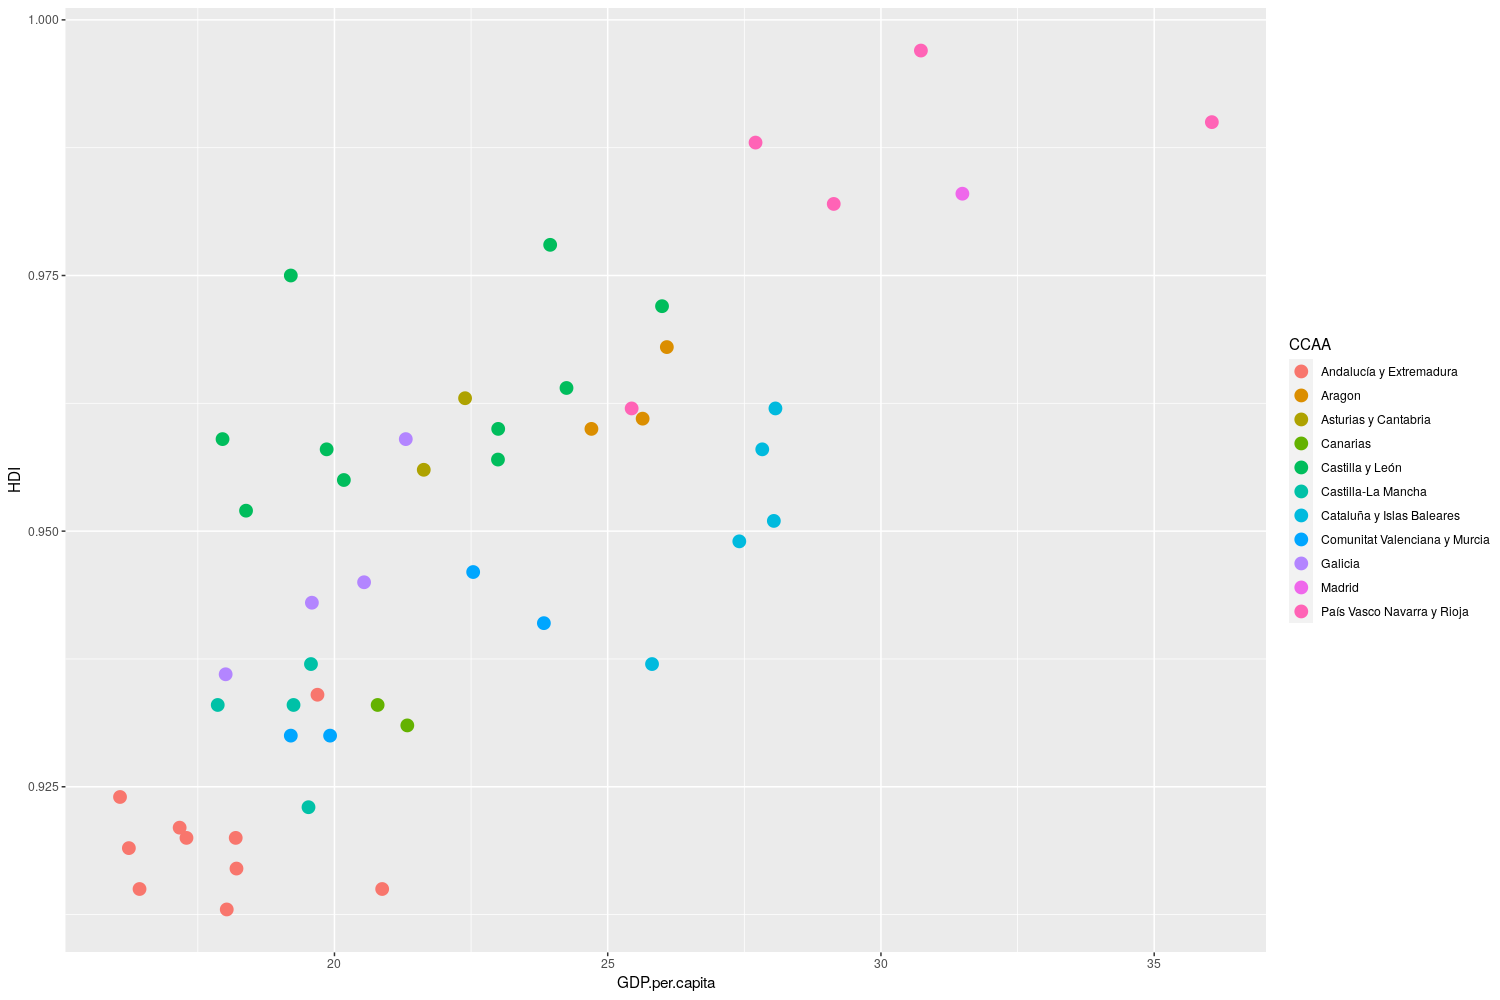

In [18]:
library(ggplot2)
ggplot(Table, aes(x = GDP.per.capita, y = HDI, color = CCAA)) + geom_point(size=4)

## Task 7

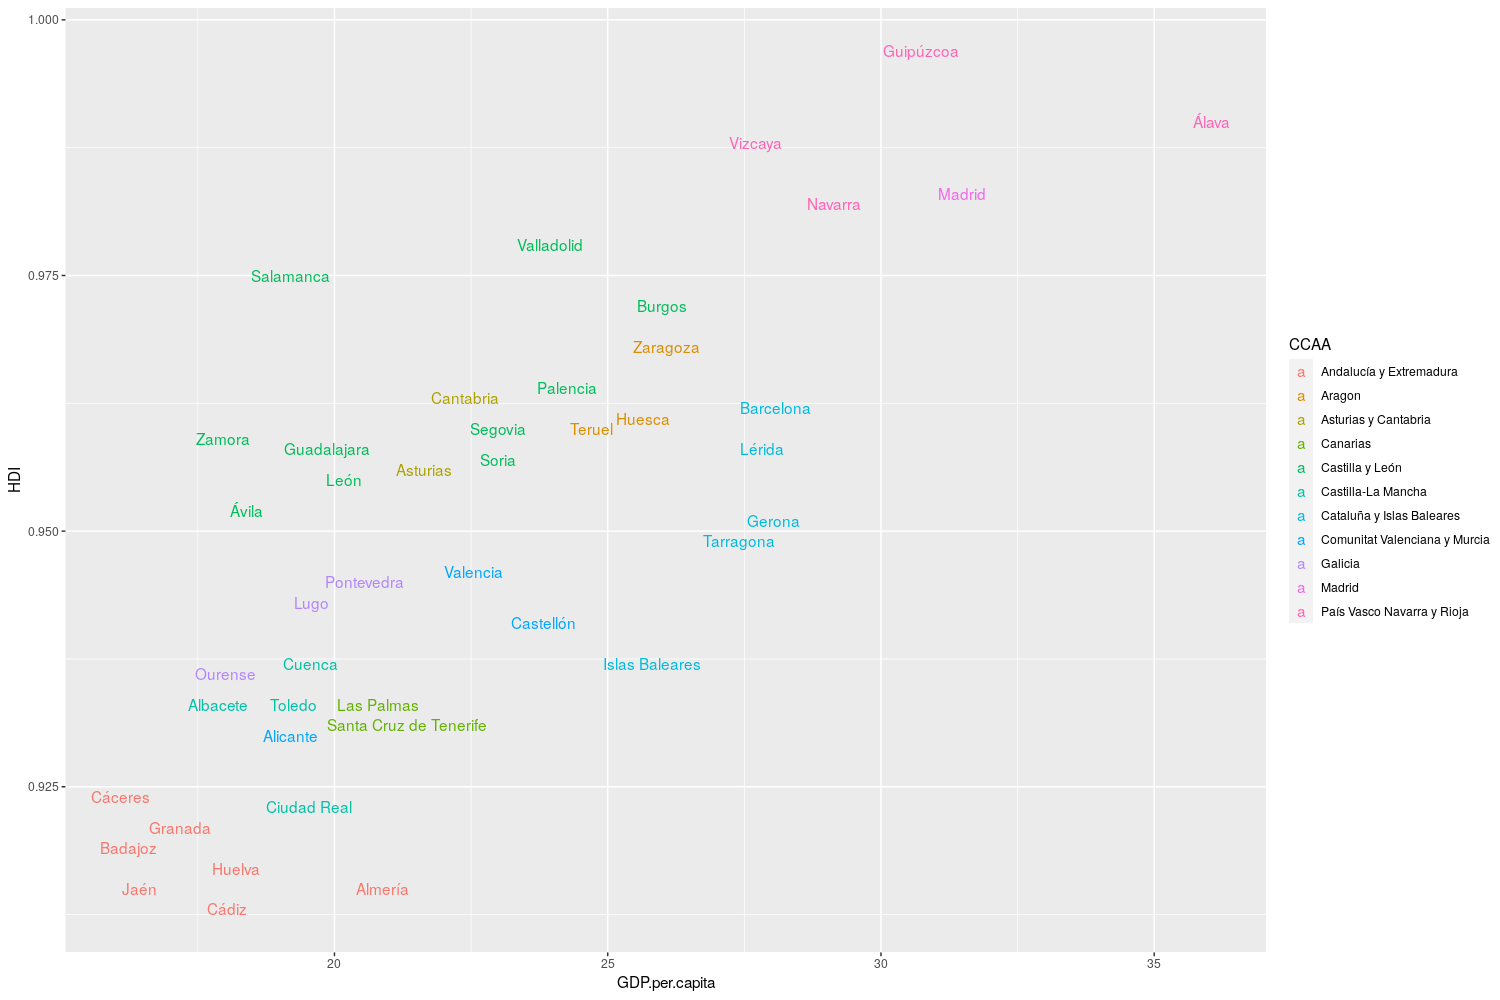

In [16]:
ggplot(Table) + geom_text(aes(x = GDP.per.capita, y = HDI, label = Province, color = CCAA), check_overlap = T)
# options(repr.plot.width = 15, repr.plot.height = 10 , repr.plot.res = 100)

## Task 8

In [10]:
Table_mean_GDP <- aggregate(Table$GDP, list(Table$CCAA), mean)
# Table_mean_GDP

Table_mean_HDI <- aggregate(Table$HDI, list(Table$CCAA), mean)
# Table_mean_HDI

Table_dev_GDP <- aggregate(Table$GDP, list(Table$CCAA), sd)
# Table_dev_GDP

Table_dev_HDI <- aggregate(Table$HDI, list(Table$CCAA), sd)
# Table_dev_GDP

GDP_m <- Table_mean_GDP[ ,2]
GDP_m
HDI_m <- Table_mean_HDI[ ,2]
HDI_m
GDP_sd <- Table_dev_GDP[ ,2]
GDP_sd
HDI_sd <- Table_dev_HDI[ ,2]
HDI_sd
CCAA <-  Table_mean_GDP[ ,1]
CCAA

[1] 17.81970 25.47433 22.01200 21.06150 21.57390 19.05250 27.43120 21.37275
 [9] 19.86075 31.49000 29.81300

[1] 0.91980 0.96300 0.95950 0.93200 0.96300 0.93150 0.95140 0.93675 0.94575
[10] 0.98300 0.98380

[1] 1.5391112 0.7045824 0.5345727 0.3839590 2.7926986 0.8047768 0.9434594
 [8] 2.1781260 1.4205488        NA 3.9952442

[1] 0.005977736 0.004358899 0.004949747 0.001414214 0.008956686 0.005972158
 [7] 0.009607289 0.008057088 0.009639329          NA 0.013311649

[1] "Andalucía y Extremadura"       "Aragon"                       
 [3] "Asturias y Cantabria"          "Canarias"                     
 [5] "Castilla y León"               "Castilla-La Mancha"           
 [7] "Cataluña y Islas Baleares"     "Comunitat Valenciana y Murcia"
 [9] "Galicia"                       "Madrid"                       
[11] "País Vasco Navarra y Rioja"

## Task 9

In [11]:
CCAA_list <- data.frame(CCAA, GDP_m, HDI_m, GDP_sd, HDI_sd)
CCAA_list

CCAA,GDP_m,HDI_m,GDP_sd,HDI_sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,0.91980,1.5391112,0.005977736
Aragon,25.47433,0.96300,0.7045824,0.004358899
Asturias y Cantabria,22.01200,0.95950,0.5345727,0.004949747
Canarias,21.06150,0.93200,0.3839590,0.001414214
Castilla y León,21.57390,0.96300,2.7926986,0.008956686
Castilla-La Mancha,19.05250,0.93150,0.8047768,0.005972158
Cataluña y Islas Baleares,27.43120,0.95140,0.9434594,0.009607289
Comunitat Valenciana y Murcia,21.37275,0.93675,2.1781260,0.008057088
Galicia,19.86075,0.94575,1.4205488,0.009639329


## Task 10

In [12]:
CCAA_list[is.na(CCAA_list)] <- 0
CCAA_list

CCAA,GDP_m,HDI_m,GDP_sd,HDI_sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,0.91980,1.5391112,0.005977736
Aragon,25.47433,0.96300,0.7045824,0.004358899
Asturias y Cantabria,22.01200,0.95950,0.5345727,0.004949747
Canarias,21.06150,0.93200,0.3839590,0.001414214
Castilla y León,21.57390,0.96300,2.7926986,0.008956686
Castilla-La Mancha,19.05250,0.93150,0.8047768,0.005972158
Cataluña y Islas Baleares,27.43120,0.95140,0.9434594,0.009607289
Comunitat Valenciana y Murcia,21.37275,0.93675,2.1781260,0.008057088
Galicia,19.86075,0.94575,1.4205488,0.009639329


## Tasks 11, 12, 13 and 14 

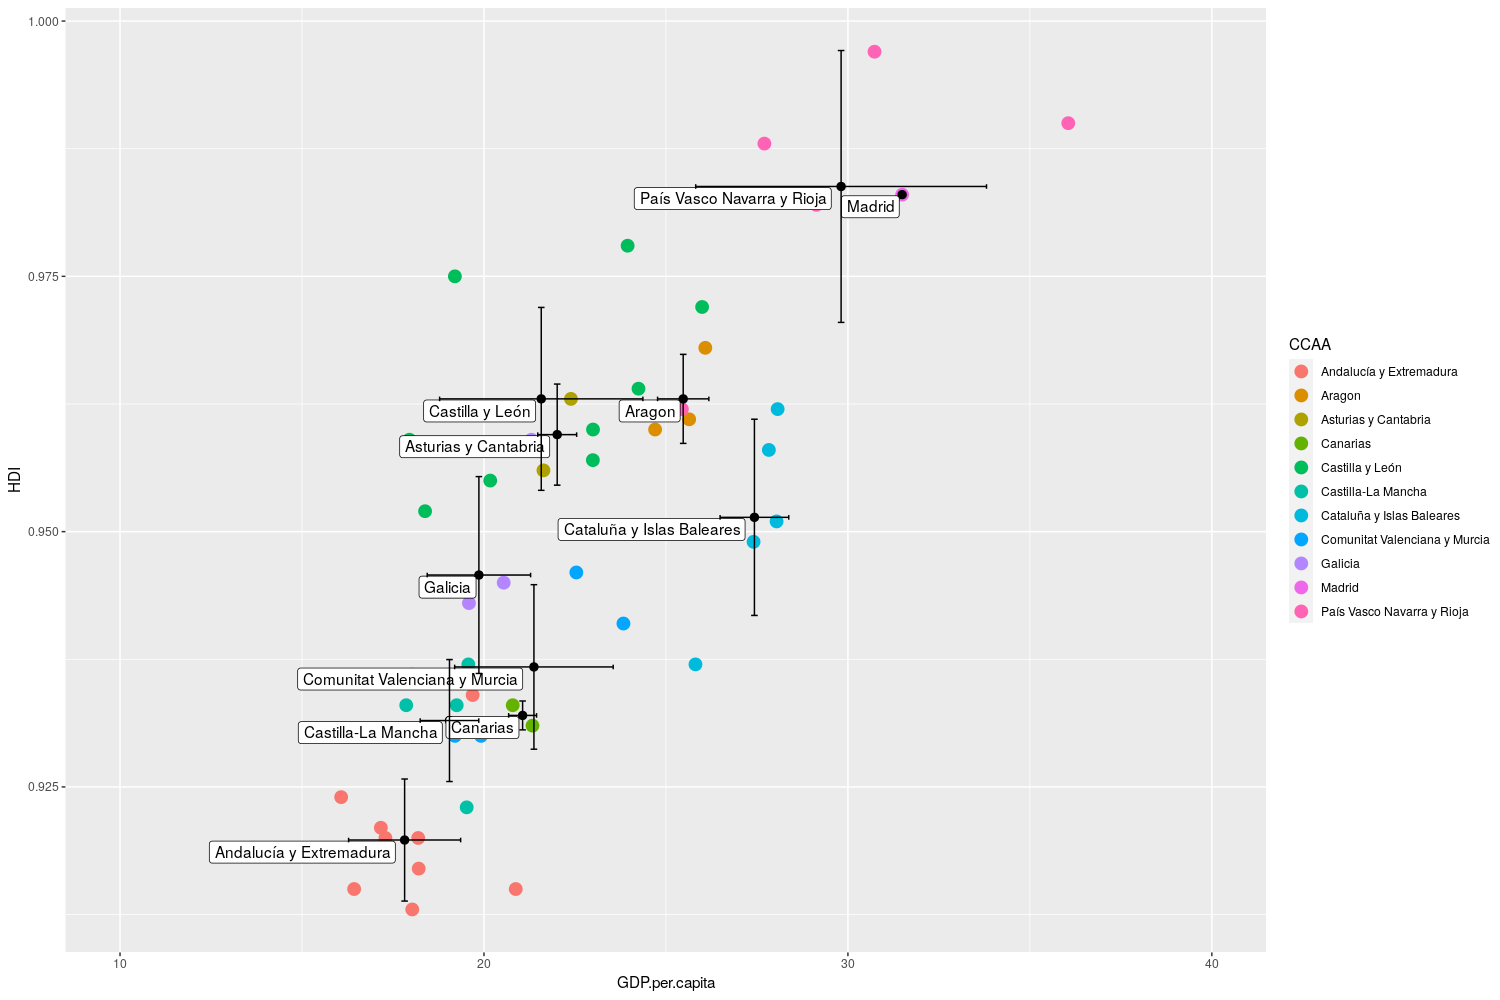

In [17]:
ggplot(Table) + geom_point(aes(x = GDP.per.capita, y = HDI, color = CCAA), size=4) + scale_x_continuous(limit = c(10,40)) +
geom_point(data = CCAA_list, aes(x = GDP_m, y = HDI_m), size = 2.5) +
geom_label(data = CCAA_list, aes(x = GDP_m, y = HDI_m, label = CCAA, hjust = 1.05, vjust = 1.05)) +
geom_errorbar(data = CCAA_list, aes(x = GDP_m, ymin = HDI_m - HDI_sd, ymax = HDI_m + HDI_sd)) + 
geom_errorbarh(data = CCAA_list, aes(y = HDI_m, xmin = GDP_m - GDP_sd, xmax = GDP_m + GDP_sd))


